# Analysis of sales of computer games for 2017

It is necessary to identify patterns that determine sales of games.

## Work plan

1. Open the file and study the general information

2. Data preprocessing:
- Convert column names to lowercase
- Process gaps and find their cause
- Examine the value of 'tbd' in the user rating column
- Calculate the total sales in all regions and write in a separate column.

3. Conduct an exploratory data analysis:
- See how many games were produced in different years.
- Let's see how sales have changed by platform. Let's choose the platforms with the highest total sales and plot the distribution by years. Let's see how long new platforms appear and disappear.
- Determine the current study period for the forecast for 2017, excluding other years.
- Select several potentially profitable platforms.
- Plot a box-and-mustache plot of global game sales by platform.
- See how the reviews of users and critics affect sales within one popular platform. Let's build a scatterplot and calculate the correlation between reviews and sales.
- Correlate the conclusions with sales of games on other platforms.
- Look at the general distribution of games by genre. We will find the most profitable genres and the most failed ones.

4. Make a portrait of the user of each region:
- Define for the user of each region (NA, EU, JP):
- Most popular platforms (top 5). Let us describe the differences in sales shares.
- The most popular genres (top 5). Let's try to explain the difference.
- Check if the ESRB rating affects sales in a particular region?

5. Check the hypotheses:
- The average user ratings of the Xbox One and PC platforms are the same;
- Average user ratings for Action and Sports genres are different.

6. General conclusion

Data description

- Name - the name of the game
- Platform - game platform
- Year_of_Release - year of release
- Genre - game genre
- NA_sales - sales in North America (millions of dollars)
- EU_sales - sales in Europe (millions of dollars)
- JP_sales - sales in Japan (millions of dollars)
- Other_sales - sales in other countries (millions of dollars)
- Critic_Score - Critics score (maximum 100)
- User_Score - user rating (maximum 10)
- Rating — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

## Open the data file and examine the general information.

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [82]:
data = pd.read_csv('games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [83]:
# check how the data table looks like
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [84]:
# изучим структуру данных
data.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The data table shows that it is necessary to perform pre-processing before starting the analysis. Let's start by converting all column names to lowercase. In addition, there are NaNs in some columns, they need to be dealt with

## Data preprocessing

In [85]:
# we will change names of columns to a lower case for the convenience of further work
data.columns = data.columns.str.lower()
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Before proceeding with any actions, let's check the data for obvious duplicate rows.

In [86]:
data.duplicated().sum()

0

In [87]:
data.nunique() == data.shape[0]

name               False
platform           False
year_of_release    False
genre              False
na_sales           False
eu_sales           False
jp_sales           False
other_sales        False
critic_score       False
user_score         False
rating             False
dtype: bool

Check for duplicates in pairs Name-Console (name-platform)

In [88]:
data.duplicated(subset=['name', 'platform'], keep= False).sum()

10

Considering that there are very few such duplicates in the light of the entire dataframe, they can simply be deleted.


In [89]:
data.drop_duplicates(subset=['name', 'platform'], keep='first')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There are no obvious duplicates of the term, you can go further.

In [90]:
# check how much data is missing in each column
data.isnull().sum().sort_values(ascending = False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Most of the NaNs are in the critic_score, user_score, and rating columns. At the same time, we remember that there are gaps in the year_of_release column, we will deal with this further.

### Convert the data to the required types

Critic_score and user_score are presented in different forms, although they are identical in meaning. Apparently critic_score is in the range 0-100, and user_score in the range 0-10. We can bring them to the same form, either by multiplying user_score by 10, or by dividing critic_score by 10. We will solve this later.
 
- 0 name - object - leave as is
- 1 platform - object - leave as is
- 2 year_of_release - float64 - convert to integer format (int), there are NaNs in the data
- 3 genre - object - leave as is, but lower case for convenience
- 4 na_sales - float64 - leave as is
- 5 eu_sales - float64 - leave as is
- 6 jp_sales - float64 - leave as is
- 7 other_sales - float64 - leave as is
- 8 critic_score - float64 - many data NaNs
- 9 user_score - object - a lot of data NaNs, type - object, although the data is in numbers, checking is needed
- 10 rating - object - many data NaNs

In [91]:
# start with the year_of_release column. Since this is the year of issue, it cannot be a fraction, it must be converted to an integer format.
# this column has missing values. Since the release year is critical to our study, and missed
# there are only 269 values out of almost 17 thousand, then we will not replace them with anything, because no median or average value
# won't "guess" the year of a computer game even close. The omission is most likely due to a technical error in filling in the data.
data['year_of_release'].unique()


array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [92]:
data = data[data['year_of_release'].notna()]
data['year_of_release'] = data['year_of_release'].astype('int')
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

The year_of_release column has been changed to the correct form, so let's move on to the genre column, it must be lowercase.

In [93]:
data['genre'] = data['genre'].str.lower()
data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

Now let's move on to the column critic_score

In [94]:
data['critic_score'].isnull().sum()

8463

In the critic_score column, almost half of the data is gaps, you can’t delete such a large amount of data, you won’t be able to replace it with medians or averages either, since these are the scores that the critics gave and no average values ​​will even get close. Let's leave it as is.

Go to the user_score column

In [95]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [96]:
data['user_score'].isnull().sum()

6607

There are quite a few gaps in the user_score column, as well as "tbd" values. Google says it means "to be determined", which is basically a blank. Apparently the object format is associated with these values, in contrast to critic_score, where there is none. Let's see how many such values we have.

In [97]:
len(data.query('user_score == "tbd"'))

2376

In total, out of 16715 table rows, we have 6607 empty rows and 2376 "tbd" rows. Only 7732 values ​​remain. Less than half. If you remove all empty lines and "tdb" lines, important data will be lost for analysis in other lines. Therefore, we will replace "tbd" with 0. This can be done because "to be determined" actually means that users do not rate the game, and therefore do not play it. This is equivalent to saying that there is no evaluation, so let's change "tbd" to nan. At the same time, we cannot replace nan with anything, because here we are talking about subjective assessments and no matter what result we set, it will not reflect the real situation.

In [98]:
data.loc[data['user_score'] == 'tbd'] = np.nan
len(data.query('user_score == "tbd"'))

0

In [99]:
data['user_score'] =  data['user_score'].astype('float')
data.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14068 non-null  object 
 1   platform         14070 non-null  object 
 2   year_of_release  14070 non-null  float64
 3   genre            14068 non-null  object 
 4   na_sales         14070 non-null  float64
 5   eu_sales         14070 non-null  float64
 6   jp_sales         14070 non-null  float64
 7   other_sales      14070 non-null  float64
 8   critic_score     6927 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           7442 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [100]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

There are no other problems besides nan. Let's replace nan with 'NR', which means No Rating, and then we will calculate games without rating exactly by these values.

In [101]:
data['rating'] = data['rating'].fillna('NR')
data['rating'].unique()

array(['E', 'NR', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Now we have a new rating - no rating.


### Add the column Total sales in all regions

In [102]:
data['all_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis = 'columns')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38


## Conduct an exploratory data analysis

### Let's see how many games were released in different years.

In [103]:
years = data.pivot_table(index ='year_of_release', values = 'name', aggfunc='count')
years.reset_index(inplace=True)
years.columns = ['year_of_release', 'quantity']
years

,year_of_release,quantity
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


<AxesSubplot:title={'center':'Games through years'}, xlabel='year', ylabel='games quantity'>

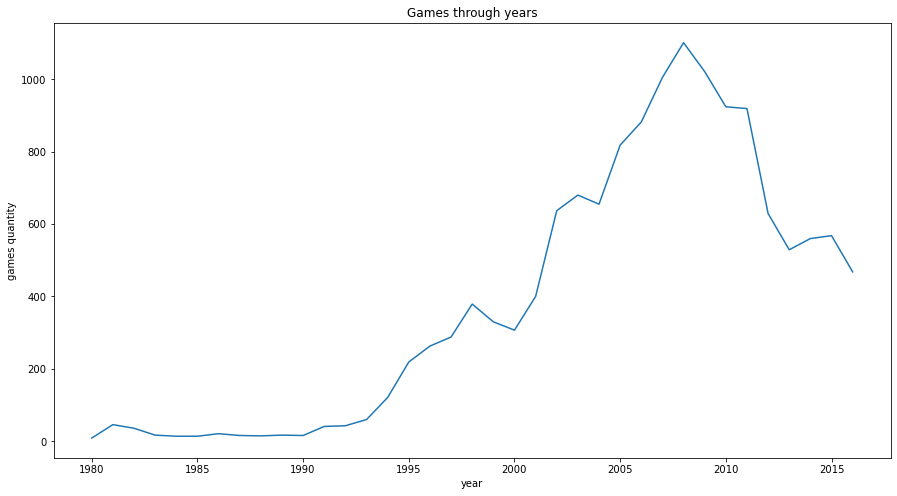

In [104]:
plt.figure(figsize=(15,8))
plt.title('Games through years')
plt.xlabel('year')
plt.ylabel('games quantity')
sns.lineplot(data=years, 
             x = 'year_of_release', 
             y = 'quantity')

After 1995, the production of games began to grow sharply, and after 2009 it also fell sharply. Perhaps this is due to the fact that game developers have switched to the production of games for smartphones, which we do not consider in this study. Therefore, we will not take into account the period before 1995.

### See how sales have changed by platform over time

Let's see how sales changed by platform. Let's choose the platforms with the highest total sales and build the distribution by years, for this we will find the amount of sales for each platform.

In [105]:
platform = data.pivot_table(index = 'platform', values = 'all_sales', aggfunc= 'sum')
platform.sort_values(by = 'all_sales', ascending = False)

,all_sales
platform,
PS2,1171.19
X360,948.74
PS3,921.09
Wii,791.91
PS,714.26
DS,655.36
PS4,314.00
PSP,273.11
GBA,263.70


There is a big difference between the sales of games on 2600 and XOne (almost twice), so let's take as successful platforms those on which game sales exceeded $100 million during the study period.

In [106]:
platform = platform.query('all_sales >= 100')
successed_platform = data.query('platform in @platform.index')


<AxesSubplot:xlabel='year_of_release', ylabel='all_sales'>

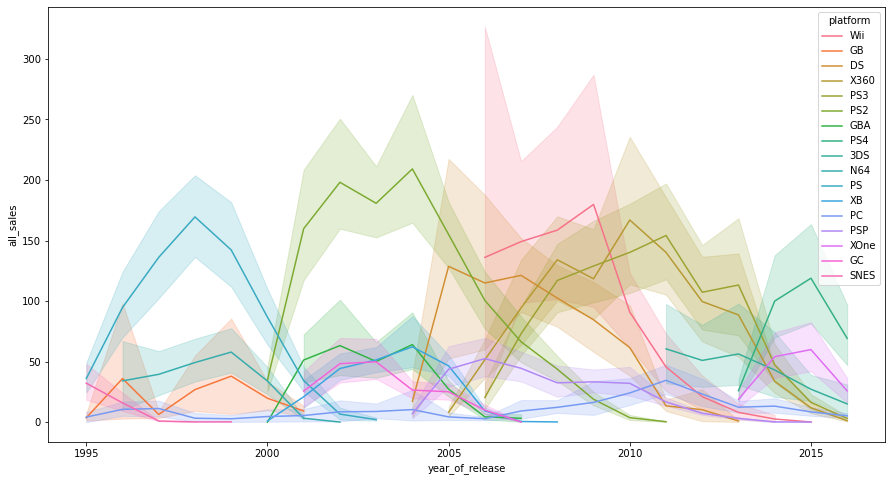

In [107]:
plt.figure(figsize=(15,8))
sns.lineplot(x = 'year_of_release', 
             y = 'all_sales', 
             hue = 'platform',
             data = successed_platform.query('year_of_release >= 1995'), 
             estimator=sum)

From the graph, you can see that the average life of a gaming platform is about 10 years.

### Determine the current study period for the forecast for 2017 without taking into account other years.

Taking into account the fact that since 1995 the gaming industry has experienced a strong rise, and since 2009, on the contrary, a decline, and also taking into account the fact that new platforms appear very quickly, it is better to take for research a period that begins no earlier than 2007 (we take into account calculation that the lifetime of the platform is 10 years), while shifting its beginning a little "to the right" by years, since the platforms that began their life in 2007 are already ending in 2017 and this is not very interesting for us.
Since there are many platforms on the chart that have already outlived their usefulness, we will shorten it to 2012-2017 to see which of the platforms can make a profit in 2017 (because from 12 to 17 exactly 5 years, which reflects half the life of the new platform, which ( theoretically) originated in 2012).
Let's create a separate dataframe for these years only.

In [108]:
list_of_years = [year for year in range(2012, 2016)]
data_2 = data[data['year_of_release'].isin(list_of_years)]
data_2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NR,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NR,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16674,Tsukigime Ranko's Longest Day,PS3,2014.0,action,0.00,0.01,0.00,0.00,NaN,NaN,NR,0.01
16678,End of Nations,PC,2012.0,strategy,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16682,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


### Choose a few potentially profitable platforms.

In [109]:
profit_platforms = data_2.pivot_table(index=['platform'], values = 'all_sales', aggfunc = 'sum')
profit_platforms.sort_values(by = 'all_sales', ascending = False)

,all_sales
platform,
PS3,284.23
PS4,244.85
X360,233.78
3DS,177.61
XOne,132.95
WiiU,77.49
PC,57.34
PSV,44.63
Wii,31.95


It could be noticed that compared to the first sales table on each platform, the amount of game sales has changed after cutting off the years before 2012. Now PS3 is in the lead, and PS2 has disappeared altogether. This means that sales of PS2 games are not of interest to us. But, nevertheless, the total number of sales cannot give us any information about the potential profitability or unprofitability of the platform in the future, we will study further. We can only find top sellers over the years and they are PS3, PS4 and X360.

Let's return to the graph of the distribution of sales for each platform over the years. The life of many platforms is coming to an end and we cannot consider them potentially profitable in 2017.

<AxesSubplot:xlabel='year_of_release', ylabel='all_sales'>

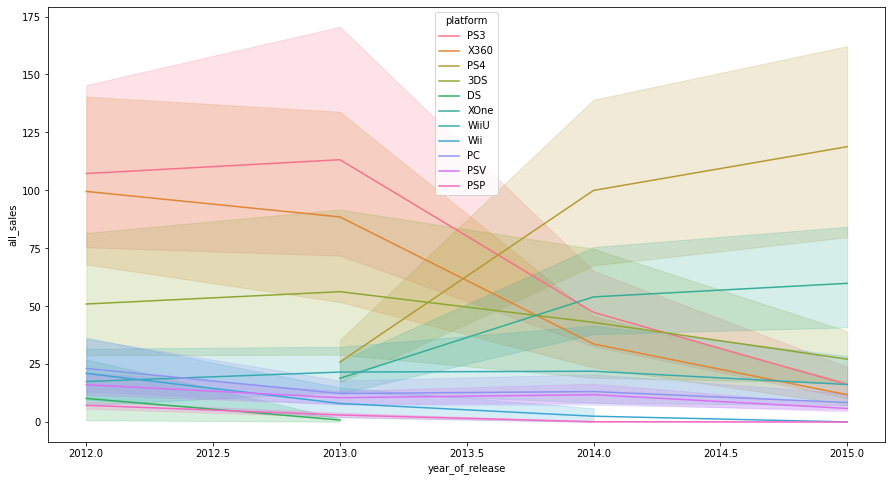

In [110]:
plt.figure(figsize=(15,8))
sns.lineplot(x = 'year_of_release', 
             y = 'all_sales', 
             hue = 'platform',
             data = data_2.query('year_of_release >= 2012'), 
             estimator=sum)

This chart already clearly shows that we still have potentially profitable platforms: PS4 and XOne, as their sales are growing, and add 3DS to them, its sales are falling, but still at an acceptable level (more than other competitors). Sales of games for the X360 were great at one time, but now it is being replaced by XOne and we will not take into account the outdated model.

### Plot a "box with a mustache" graph of global game sales by platform.

In [111]:
three_platforms = data_2[data_2['platform'].isin(['PS4', 'XOne', '3DS'])]

[(0.0, 3.0)]

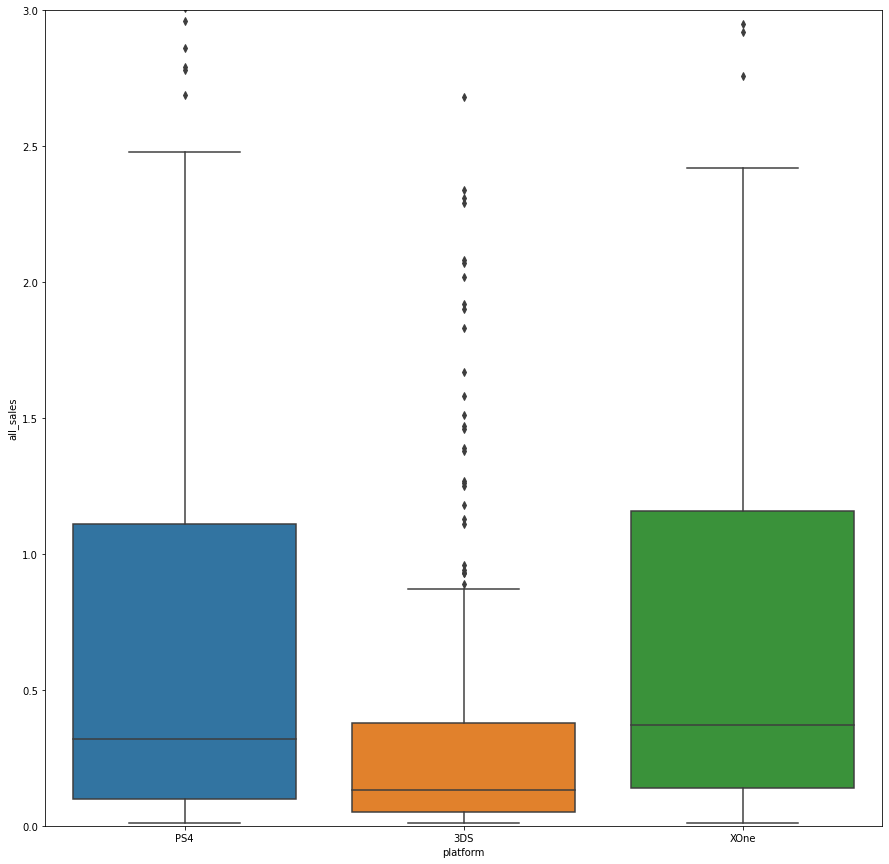

In [112]:
plt.figure(figsize=(15,15))
sns.boxplot(x='platform', 
            y='all_sales', 
            data = three_platforms).set(ylim=(0, 3))

In [113]:
three_platforms.loc[three_platforms['platform'] == 'PS4', 'all_sales'].describe()

count    227.000000
mean       1.078634
std        1.902738
min        0.010000
25%        0.100000
50%        0.320000
75%        1.110000
max       14.630000
Name: all_sales, dtype: float64

In [114]:
three_platforms.loc[three_platforms['platform'] == 'XOne', 'all_sales'].describe()

count    157.000000
mean       0.846815
std        1.188801
min        0.010000
25%        0.140000
50%        0.370000
75%        1.160000
max        7.390000
Name: all_sales, dtype: float64

PS4 shows the most sales, but by median it is comparable to XOne (XOne has even a little more median). We took the 3DS here last, for the company, and it shows appropriate results. By and large, the distribution of sales on PS4 and XOne is almost the same, PS4 is won by single hits that cost a lot and are sold in large numbers. Plus, brand awareness in the world is slightly higher than that of XOne.


### Take a look at how sales within one popular platform are affected by player and critic reviews based on PS4 game sales.

In [115]:
#create a new column with the total rating of players and critics
# for this, we divide the critics' rating by 10
data_2['total_score'] = data_2['critic_score'] / 10 + data_2['user_score']

#### Dependence of sales of games on PS4 on the joint ratings of players and critics

In [116]:
#separate the data for the PS4 platform into a separate dataframe
#separate the PS4 games into a separate dataframe
PS4 = data_2.query('platform=="PS4"')
PS4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,total_score
31,Call of Duty: Black Ops 3,PS4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NR,14.63,NaN
42,Grand Theft Auto V,PS4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,18.0
77,FIFA 16,PS4,2015.0,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,12.5
87,Star Wars Battlefront (2015),PS4,2015.0,shooter,2.99,3.49,0.22,1.28,NaN,NaN,NR,7.98,NaN
92,Call of Duty: Advanced Warfare,PS4,2014.0,shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15556,Natsuiro High School: Seishun Hakusho,PS4,2015.0,action,0.00,0.00,0.02,0.00,NaN,NaN,NR,0.02,NaN
15762,Rabbids Invasion: The Interactive TV Show,PS4,2014.0,misc,0.00,0.01,0.00,0.00,NaN,NaN,NR,0.01,NaN
15943,Professional Farmer 2016,PS4,2015.0,action,0.00,0.01,0.00,0.00,NaN,NaN,NR,0.01,NaN
16158,Raven's Cry,PS4,2015.0,role-playing,0.00,0.01,0.00,0.00,NaN,NaN,NR,0.01,NaN


0.2357945337451421

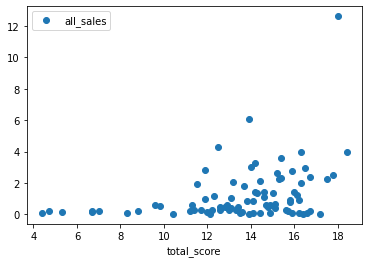

In [117]:
# joint ratings of critics and players
factor_score = PS4.pivot_table(index = 'total_score', values = 'all_sales')
factor_score.plot(style = 'o')
data['all_sales'].corr(PS4['total_score'])


After studying the correlation between the joint ratings of critics and players, it can be concluded that it is weak and direct.

#### Dependence of PS4 game sales on critics' ratings

0.4318482049982005

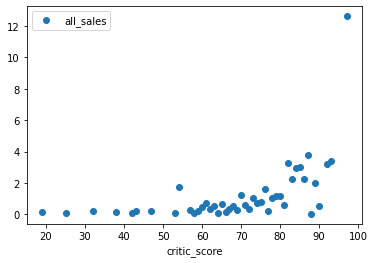

In [118]:
#critic scores
factor_critics = PS4.pivot_table(index = 'critic_score', values = 'all_sales')
factor_critics.plot(style = 'o')
data['all_sales'].corr(PS4['critic_score'])

When examining the correlation between game sales and critic ratings, one can notice an average positive relationship between these values. It can be concluded that games that are warmly acclaimed by critics have shown better sales than games that have been highly acclaimed by the players.

#### Dependence of PS4 game sales on player ratings

0.024230832360622553

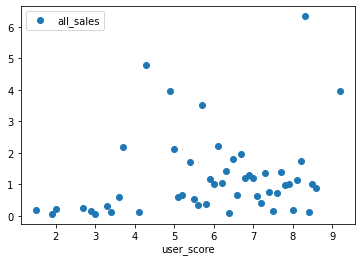

In [119]:
#gamers score
factor_users = PS4.pivot_table(index = 'user_score', values = 'all_sales')
factor_users.plot(style = 'o')
data['all_sales'].corr(PS4['user_score'])

There is no correlation between player ratings and game sales.


### Compare the dependence on ratings on PS4 with other platforms.

#### Зависимость продаж игр на XOne от совместных оценок

0.2355976881236628

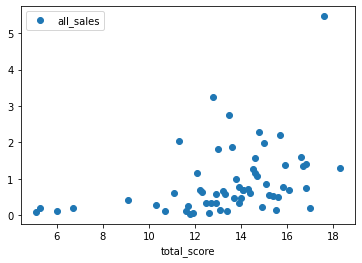

In [120]:
XOne = data_2.query('platform=="XOne"')
XOne_score = XOne.pivot_table(index = 'total_score', values = 'all_sales')
XOne_score.plot(style = 'o')
data['all_sales'].corr(XOne['total_score'])

Ислледование корреляции Пирсона выявило небольшую прямую зависимость между совместными оценками критиков и игроков, но она меньше, чем в случае PS4. 


#### Dependence of sales of 3DS games on joint ratings

0.2821063228207045

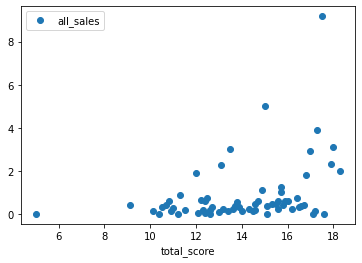

In [121]:
threeDS = data_2.query('platform=="3DS"')
threeDS_score = threeDS.pivot_table(index = 'total_score', values = 'all_sales')
threeDS_score.plot(style = 'o')
data['all_sales'].corr(threeDS['total_score'])

We see a similar pattern when examining Pearson's correlation between player and critic ratings and 3DS game sales.

We can conclude that the correlation between sales of games on any platform from ratings is approximately the same (not too big), but still it exists and it is direct. At the same time, there is no correlation between sales and player ratings at all, but there is a correlation with critic ratings.

### General distribution of games by genre. We will find the most profitable genres and the most failed ones.

In [122]:
genres = data_2.pivot_table(index='genre', values='all_sales', aggfunc=('count','sum'))
genres.columns = ['games', 'all_sales']
genres = genres.sort_values(by='games', ascending=False)
genres

,games,all_sales
genre,,
action,811,407.16
role-playing,316,174.62
adventure,236,24.72
sports,204,156.58
shooter,185,266.42
misc,151,79.89
fighting,91,39.97
racing,88,50.46
platform,66,57.36


<AxesSubplot:xlabel='genre'>

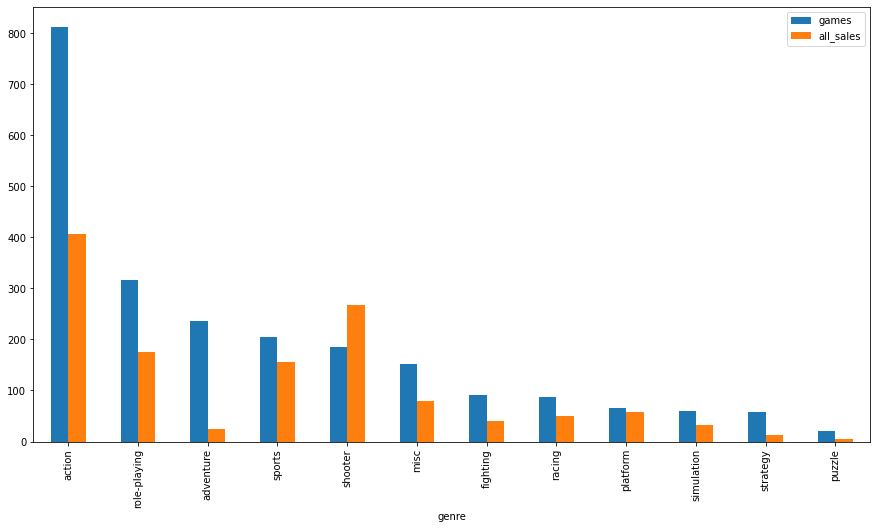

In [123]:
genres.plot(kind='bar', figsize=(15,8))

Most of the games produced are in the action genre, but at the same time, the total earnings of manufacturers from them are not as large as, for example, from games of the shooter genre, in which the ratio of money earned to the number of games is greater than 1. In all other genres, except shooter, the ratio earned money to the number of released games is less than 1. Rpg and sports genres are also very popular. In addition, you should pay attention to the platform genre, there are not many games in this genre, but they fully pay for their production.
The most failed genres are adventure, where the ratio of proceeds to released games is very low, strategy and puzzle.

## Compile a user profile for each region and study the impact of the ESRB rating on sales by region.

### Describe the differences in shares for the most popular platforms (TOP-5) by region.

In [124]:
#let's make a pivot table with sales by platform for all regions
region_platform = data_2.pivot_table(index='platform', 
                            values=('na_sales','eu_sales', 'jp_sales','other_sales','all_sales'), aggfunc='sum')
region_platform = region_platform.sort_values('all_sales', ascending = False).head()
region_platform

,all_sales,eu_sales,jp_sales,na_sales,other_sales
platform,,,,,
PS3,284.23,105.25,33.64,102.53,42.81
PS4,244.85,109.31,10.22,87.22,38.10
X360,233.78,73.46,1.56,138.60,20.16
3DS,177.61,39.33,79.66,50.52,8.10
XOne,132.95,41.93,0.33,78.68,12.01


<AxesSubplot:ylabel='Rest of the World'>

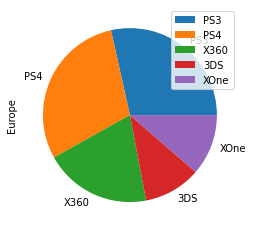

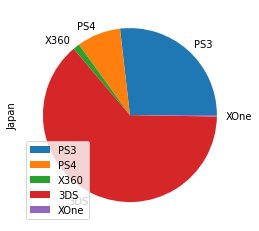

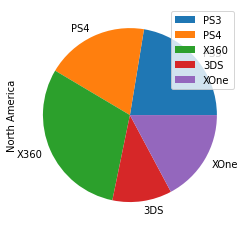

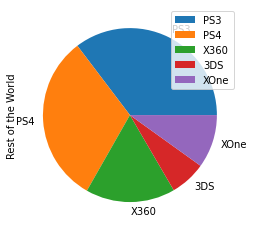

In [125]:
# look at the sales chart by platform in Europe
region_platform.plot(y = 'eu_sales', kind="pie", label="Europe")

# look at the sales chart by platform in Japan
region_platform.plot(y = 'jp_sales', kind="pie", label="Japan")

# look at the sales chart by platform in America
region_platform.plot(y = 'na_sales', kind="pie", label="North America")

# look at the sales graph by platform in the rest of the world
region_platform.plot(y = 'other_sales', kind="pie", label="Rest of the World")

As could be seen from the pie charts:
- in Europe, PS3 and PS4 are in the lead, since PS3 is an outgoing platform, it is better to bet on PS4 in the future (in fact, this is the same platform with the same games, the difference is only in the generation of consoles)
- in Japan, 3DS leads by a very large margin
- in North America, X360 leads, but PS3 and PS4 breathe down his back, so in this region it is better to rely on X360 (XOne in the future) and PS4
- in the rest of the world, PS3 and PS4 are the undisputed leaders, the future belongs to PS4.

### Describe the differences in shares for the most popular genres (TOP-5) by region.

In [126]:
#a pivot table with sales by genre for all regions
region_genre = data_2.pivot_table(index='genre', 
                                  values=('na_sales','eu_sales', 'jp_sales','other_sales','all_sales'), 
                                  aggfunc='sum')
region_genre = region_genre.sort_values('all_sales', ascending = False).head()
region_genre 

,all_sales,eu_sales,jp_sales,na_sales,other_sales
genre,,,,,
action,407.16,146.94,45.27,167.18,47.77
shooter,266.42,97.51,8.16,128.51,32.24
role-playing,174.62,44.25,58.83,58.11,13.43
sports,156.58,56.76,6.85,73.64,19.33
misc,79.89,24.40,11.82,36.37,7.30


<AxesSubplot:ylabel='Rest of the world'>

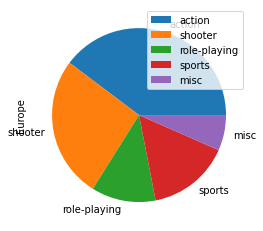

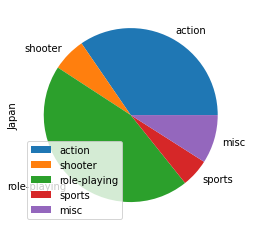

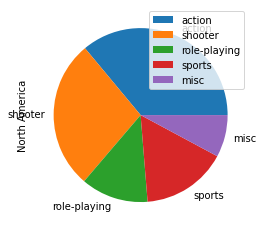

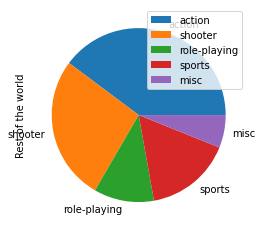

In [127]:
# look at the sales chart by region in Europe
region_genre.plot(y = 'eu_sales', kind="pie", label="Europe")

# look at the sales chart by region in Japan
region_genre.plot(y = 'jp_sales', kind="pie", label="Japan")

# look at the sales chart by region in the Americas
region_genre.plot(y = 'na_sales', kind="pie", label="North America")

# look at the sales chart by region in the Rest of the World
region_genre.plot(y = 'other_sales', kind="pie", label="Rest of the world")

From the pie charts, we can conclude that:
- in Europe, the genre is action and shooter in second place
- in Japan, RPG is leading, and action is catching up with it
- in North America, action and shooter are leading, as in Europe
- in the rest of the world, action and shooter, as well as in Europe and the USA, share 1st and 2nd places in the rating

Typical player portraits:
- in Europe they play action on PS4 and PS3
- in America they play action on X360
- in Japan they play RPG on 3DS
- in the rest of the world they play action on PS3 and PS4

### Consider the impact of the ESRB rating on regions.

In [128]:
#a pivot table with sales by platform for all regions
rating = data_2.pivot_table(index='rating',
                            values=('na_sales','eu_sales', 'jp_sales','other_sales','all_sales'), 
                            aggfunc='sum')
rating = rating.sort_values('all_sales', ascending = False)
rating

,all_sales,eu_sales,jp_sales,na_sales,other_sales
rating,,,,,
M,471.72,177.42,20.00,215.86,58.44
NR,297.97,83.84,94.52,94.74,24.87
E,257.50,97.43,27.02,105.07,27.98
E10+,141.42,49.20,7.61,69.85,14.76
T,138.29,43.17,23.31,56.99,14.82


Rating Descriptions:
- "E" ("Everyone") - "For everyone": the content is quite suitable for the age category of 6 years and older
- "T" ("Teen") - "Teens": the game is suitable for persons aged 13 and over
- "M" ("Mature") - "Mature": game content is not suitable for teenagers under 17 years old.
- "E10+" ("Everyone 10 and older") - "For everyone 10 years and older": no comment
- "NR" ("No Rating") - "No rating": all games that are not rated by the ESRB are collected here.

<AxesSubplot:ylabel='Rest of the world'>

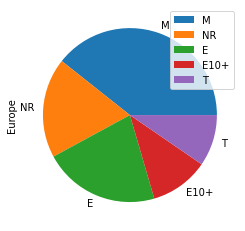

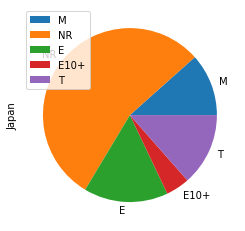

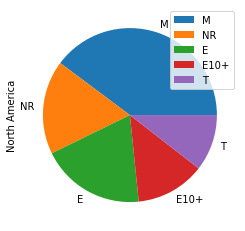

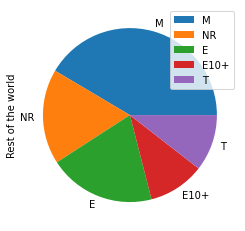

In [129]:
# look at the chart of sales by rating in Europe
rating.plot(y = 'eu_sales', kind="pie", label="Europe")

# look at the chart of sales by rating in Japan
rating.plot(y = 'jp_sales', kind="pie", label="Japan")

# consider the chart of sales by rating in America
rating.plot(y = 'na_sales', kind="pie", label="North America")

# look at the chart of sales by rating in the rest of the world
rating.plot(y = 'other_sales', kind="pie", label="Rest of the world")

In all countries except Japan, M-rated games (adults only) are in the lead, usually with the most interesting content for the players, dismemberment, nudity and obscene language. Many players under the age of 17 play these games until their parents see or turn a blind eye. In Japan, this is not the case. Since the people of this country take the rules very seriously, no teenager will play a game to which he has not yet "grown up". Therefore, games with ratings E and T are in the lead there. That is, they are acceptable for teenagers. M games are also present there, as adults also like to play in the evenings.

## Test the hypotheses

### The average user ratings of the Xbox One and PC platforms are the same

The study will be carried out over the entire dataframe, excluding years, because the XOne has a certain life span that does not depend on us, and the PC is generally immortal. But still, nan will have to be removed from user_score, otherwise it will not be possible to calculate the p-value.

In [130]:
data['user_score'] = data['user_score'].fillna(0)
data = data.drop(data[data['user_score'] == 0].index)
data['user_score'].unique()

array([8. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9, 8.1,
       8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2, 9.2,
       7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8, 6.1,
       6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8, 5.6,
       5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5, 2.5,
       1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 1.6, 9.6,
       2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6, 1.4,
       0.9, 1. , 9.7])

- H0. The average user ratings of the XOne and PC platforms are the same.
- H1. The average user ratings of the XOne and PC platforms are different.

In [131]:
XOne = data[data['platform'] == 'XOne']['user_score']
PC = data[data['platform'] == 'PC']['user_score']

results = st.ttest_ind(
     XOne,
     PC,
     equal_var = False)

alpha = 0.05
print('p_value is ', results.pvalue)

if results.pvalue < alpha:
     print("Reject the null hypothesis")
else:
     print("Failed to reject null hypothesis")

p_value is  4.5385802963771776e-06
Reject the null hypothesis


In [132]:
# check yourself
print('Mean rating for XOne:', XOne.median())
print('PC average rating:', PC.median())

Mean rating for XOne: 6.8
PC average rating: 7.5


The hypothesis that the ratings for XOne and PC are not the same turned out to be correct. On average, the rating of PC games is almost 1 point out of 10 higher.

### The average user ratings for the Action and Sports genres are different.

We will conduct the study throughout the entire dataframe, excluding years, because a genre is a genre, people either love it or not, regardless of the platform.

- H0. The average user ratings for the Action and Sports genres are different.
- H1. The average user ratings for the Action and Sports genres are the same.

In [135]:
action = data[data['genre'] == 'action']['user_score']
sports = data[data['genre'] == 'sports']['user_score']

results = st.ttest_ind(
     action,
     sports,
     equal_var = False)

alpha = 0.05
print('p_value is ', results.pvalue)

if results.pvalue < alpha:
     print("Reject the null hypothesis")
else:
     print("Failed to reject null hypothesis")

p_value is  0.07370217419278534
Failed to reject null hypothesis


In [136]:
# check yourself
print('Average rating of Action games:', action.median())
print('Sports:', sports.median())

Average rating of Action games: 7.4
Sports: 7.4


Our null hypothesis that the average ratings of Action and Sports games are different turned out to be incorrect. The ratings are exactly the same.

## General conclusion

- 1. After 1995, the production of games began to grow sharply, and after 2009 it also fell sharply. Perhaps this is due to the fact that game developers have switched to the production of games for smartphones, it may be more profitable to make a game on a smartphone than on a gaming platform or on a PC.
- 2. The average life of a gaming platform is about 10 years, so it is not profitable to make a game on those gaming platforms that are ending their lifespan.
- 3. The top sellers in recent years are PS3, PS4 and XBox 360. But when producing a new game, it is better to focus on PS4 and Xbox One, because the games for them are still relevant at the end of 2016.
- 4. There is a correlation between critics' ratings and sales of games, it is average and direct. There is no correlation between player ratings and game sales.
- 5. Shooters, sports and rpg show the best sales figures, if we take into account sales worldwide.
- 6. For sales in Europe, it is better to make an action or shooter on PS4 with an M rating.
- 7. For sales in Japan, it's better to do RPG or action on 3DS, but the rating will have to be obtained from a Japanese rating agency.
- 8. For sales in North America, it is better to make an action or shooter for Xbox One with an M rating.
- 9. Players in third world countries as well as in America and Europe like games more cover, so the M rating will be just right. The platform is more likely PS4, but Xbox One is also suitable.
- 10. If you want to do something universal, then it’s better not to do it, nothing good happens universal, anyway, someone will not like it. But still, the game for all regions should be made multiplatform. As for the rating, you can do M (you still get your own in Japan) or E, there are a lot of playing children and adults in the world who want to return to childhood or play with the whole family.
- 11. As for the PC, they will still play on it, and sometimes the ratings on it are higher than on the console (for example, on the same XBox). Also, the game for PC will be relevant longer, since upgrading a computer to a new generation is easier than changing a console.
- 12. Sports and action show the same ratings, so you can make a game in any of these genres.